# Find Pyramids examples
This notebook explains the basics of using the `PyramidTool` to segment SEM images of pyramid facets and measure their properties. The Python code is available at: https://github.com/AEljarrat/pyramids email: aeljarrat@physik.hu-berlin.de

## Introduction: Measuring pixel size
There are some example images and calculation results in the `./images` and `./results` folders, respectively. Let's load one of these images and see how it looks like and do some simple exercise. We will put a scale to the image so our measurements have poper units (e.g. µm).

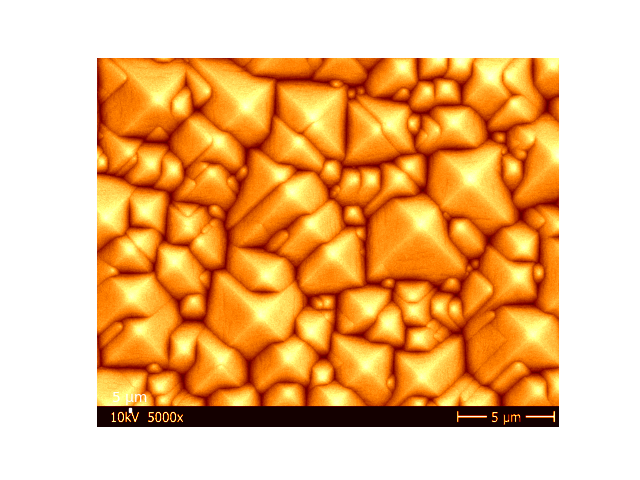

In [1]:
%matplotlib widget
from pyramids.source import Image

# these are in the images folder
image_name = '39-31 top 5kx.tif' 
#image_name = '39-58 top 5kx.tif' 
#image_name = '39-65 top 5kx.tif' 

im = Image('./images/'+image_name, autocrop=False)
f, axs = im.show()

> The pixel-size information is not set, so the scalebar (bottom left) is not correct. We can use the scalebar in the image to get the pixel-size information. For this purpose zoom on the image and note the initial and final pixel indices in the box below.

In [2]:
S  = 5.     # scalebar size in µm
x1 = 989    # right pixel of the scale bar
x0 = 780    # left ...
ps = S / (x1 - x0)

print('Pixel Size = {0:.5f} µm / pixel'.format(ps))

Pixel Size = 0.02392 µm / pixel


> Now the image can be informed of its pixel-size so we get scaled measurements. This scale is the same for all images acquired with this magnification and field-of-view.

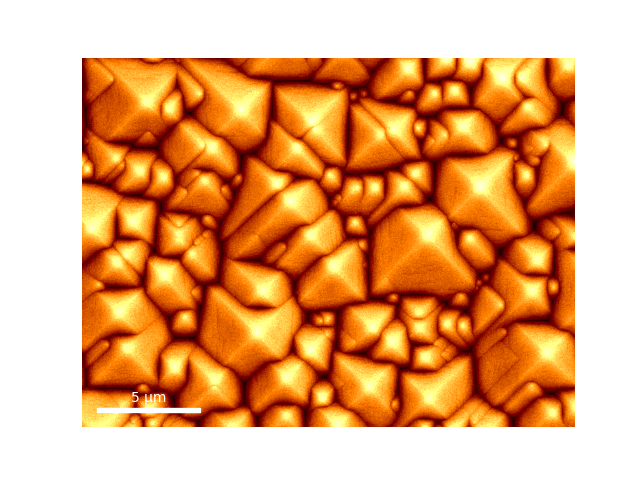

In [3]:
im = Image('./images/'+image_name, pixel_size=ps, autocrop=True)
f, axs = im.show()

## Example 1: Using the `PyramidTool` to segment SEM images
This tool has two steps, first an automatic scripts finds most of the local maxima (pyramid apices), second an interactive plot allows the user to manually correct the result. 

**Step 1.** This step is automatically performed when the tool is initialized (although it can be repeated if necessary). Automatic scripts aim to find the local maxima in the image using some fast filtering steps. Note that they only achieve partial success in finding the maxima so we need to correct the result by hand. 

What the automatic scripts do:
- Find the foreground automatically.
- Use brute force to find ALL local maxima in the foreground.
- Reduce this result to single isolated indices.
- Basin fill using watershed segmentation to obtain the color pyramids. 

**Step 2** This step is manually performed by the user. An interactive plot allows to quickly correct the result. If the automatic script step was done correctly, most of the larger pyramid apices have been automatically found. Some of the more intense could show 2 or more maxima which may be wrong. Also small pyramids are very hard to automatically find but can be typically found by eye examination in a few minutes time. The interactive plot has some built in functionality to manually edit the result:

- Using the Left / Right click buttons we can Add / Remove points from the plots.
- The watershed segmentation is repeated every time a point is Added / Removed (colors are updated accordingly).

When we are done the result can be saved. A load command is also provided to retrieve saved results. These will be showed in the boxes below.

Try running the code below then adding and removing some points using the left and right mouse buttons. Notice how the segmented image (lower panel with colors) is updated each time. 

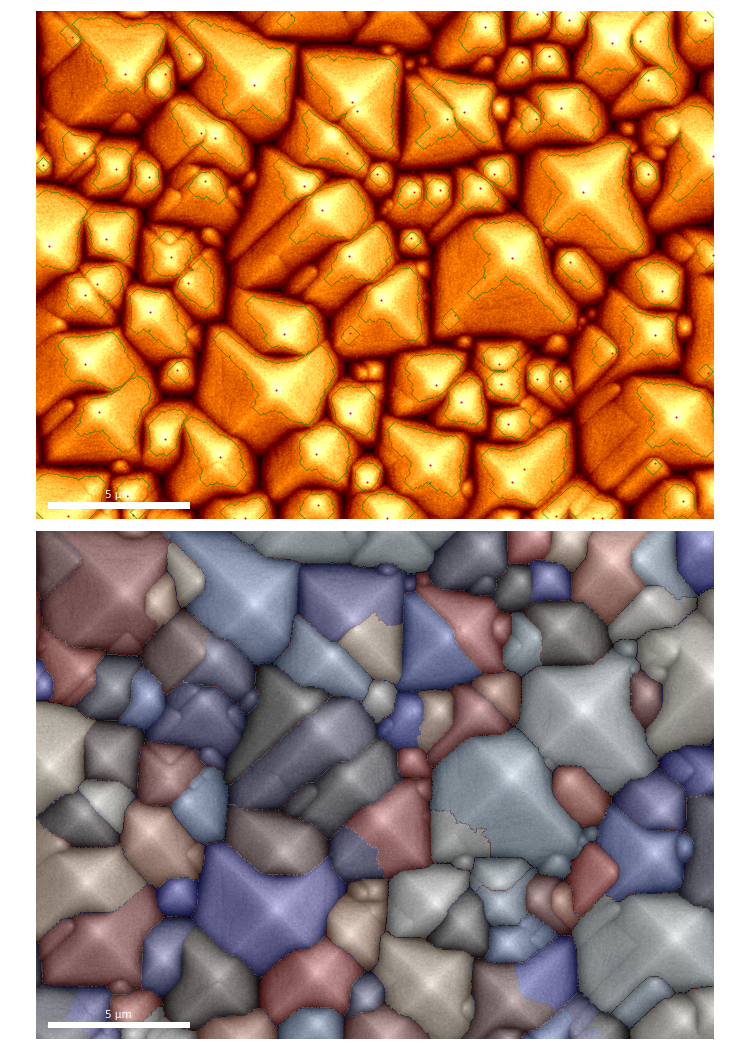

In [31]:
%matplotlib widget
from pyramids.source import Image, PyramidTool

# select one of the images from the folder
image_name = '39-31 top 5kx.tif' 
#image_name = '39-58 top 5kx.tif' 
#image_name = '39-65 top 5kx.tif' 

im = Image('./images/'+image_name, pixel_size=0.02392)
im.median_filter(size=2)
pt = PyramidTool(im, dpi=75, figsize=(10, 14))

> When all the possible mistakes are corrected and the segmentated image looks good, the result might be saved using the `save_coordinates` method. Saving produces a NPY file (an array of coordinates) that can be re-loaded afterwards using a `load_coordinates` method. Note that after running the code below a `test.npy` file appears in the Jupyter dashboard. We can download this file to our hard drive to preserve our results. 

In [5]:
pt.save_coordinates('test') # save the results (appear in the dashboard)

In [6]:
pt.load_coordinates('test.npy') # from the dashboard

## Example 2: Using the `PyramidTool` to measure the pyramids
Once the segmentation is performed (see Example 1), and all the pyramids in the SEM image have been found, we can proceed to measure them. This is done in a completely automated fashion by calling the `measure_pyramids` method. This method ray-traces the pyramid vertices at a given angle. The steps are as follows:

- The center of each pyramid is re-calculated to improve the results.
- An angle is provided by the user (e.g. 45 deg).
- From each pyramid center 4 rays are traced using the provided angle.
- A pyramid vertex is found where each ray touched the pyramid boundary.

This step is automatic and works really well if the pyramid segementation in the previous section was good. Try it here below with a saved result! 

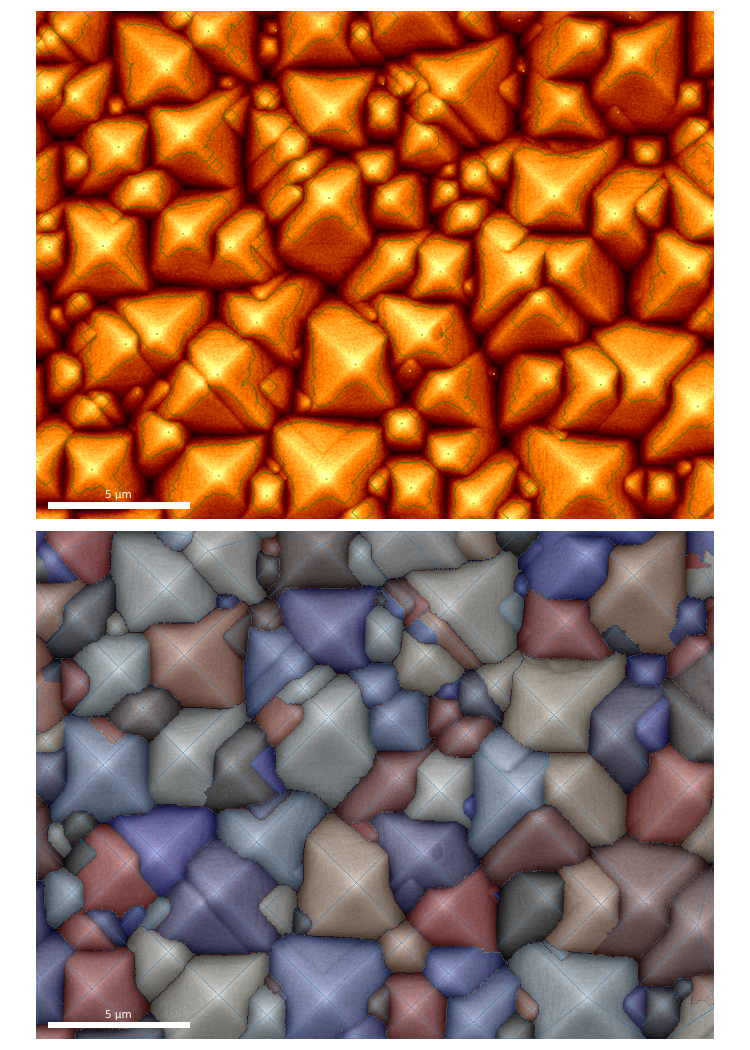

In [1]:
%matplotlib widget

#image_name = '39-31 top 5kx.tif' 
image_name = '39-58 top 5kx.tif' 
#image_name = '39-65 top 5kx.tif' 

from pyramids.source import Image, PyramidTool

im = Image('./images/'+image_name, pixel_size=0.02392)
im.median_filter(size=2)
pt = PyramidTool(im, dpi=75, figsize=(10, 14))

# load saved segmentation
pt.load_coordinates('./results/'+image_name.replace('.tif', '')+' - pyramid coords.npy')

# measure the pyramids
pt.measure_pyramids(pyramid_angle=45.)

> Measure pyramids can be called again in case an adjustment is desired. Run the first code box below and notice how the rays in the lower panel of the plot change. Adjusting the `pyramid_angle` attribute allows to analyze SEM images with different orientations.

In [2]:
pt.measure_pyramids(pyramid_angle=35) # this is wrong, look at the plot!

In [3]:
pt.measure_pyramids(pyramid_angle=45) # good again.

> The measurement results can be saved using the `save_pyramid_measurements` method. This produces an NPZ file (array collection) containing one apex and four vertex coordinates for each pyramid. We can use this file to re-load the measurements results using a `load_pyramid_measurements` method.

In [11]:
pt.save_pyramid_measurements('test') # save the results (appear in the dashboard)

## Example 3: using the `PyramidTool` to re-load results, batch mode
Notice some `test.npy` and `test.npz` should have appeared in the Jupyter dashboard after running all the previous examples. When executing online notebooks, downloading the NPY and NPZ files generated after the calculations is a good idea.  This allows to recover the results, even if the `PyramidTool` code is not available at the moment. They are `numpy` arrays that can be loaded using the `numpy.load` method (see Example 4). Of course, we can also use the loading methods described above. 

While the figures are interactive, they can be saved to disk using the save button below each panel. After closing them with the "power off button", the figures can still be saved from the browser in PNG format or in various formats using the `matplotlib.savefig` method.

The examples in the `./results` folder have been measured previously and the results can be re-loaded quickly for examination. Try running the code-box below!

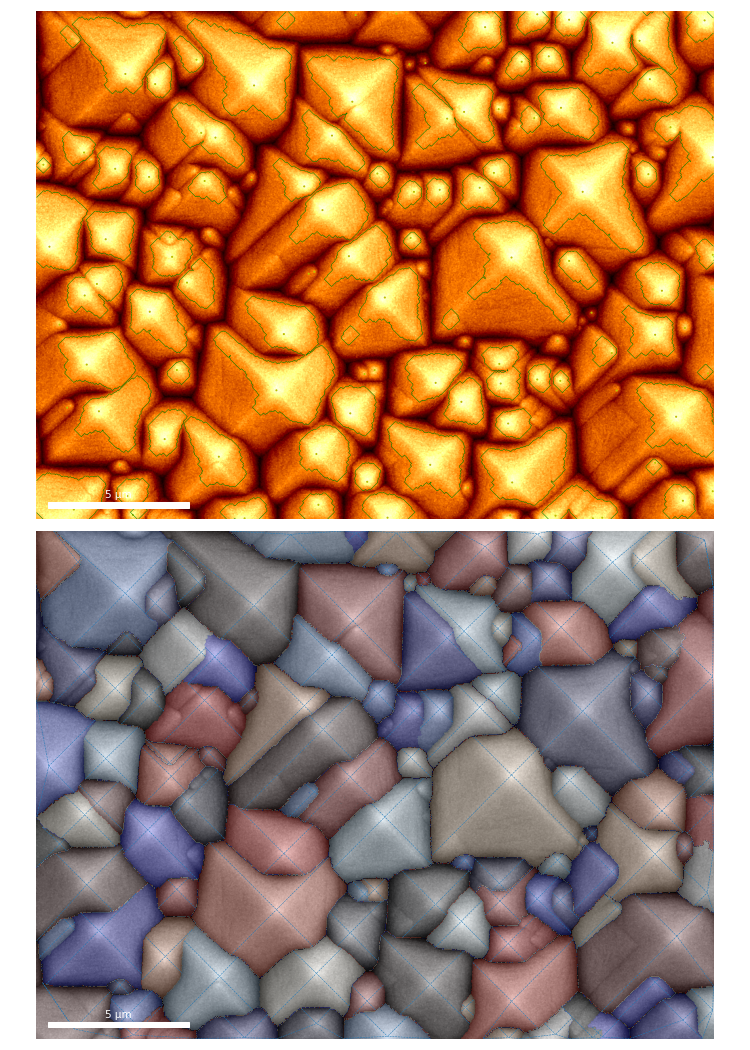

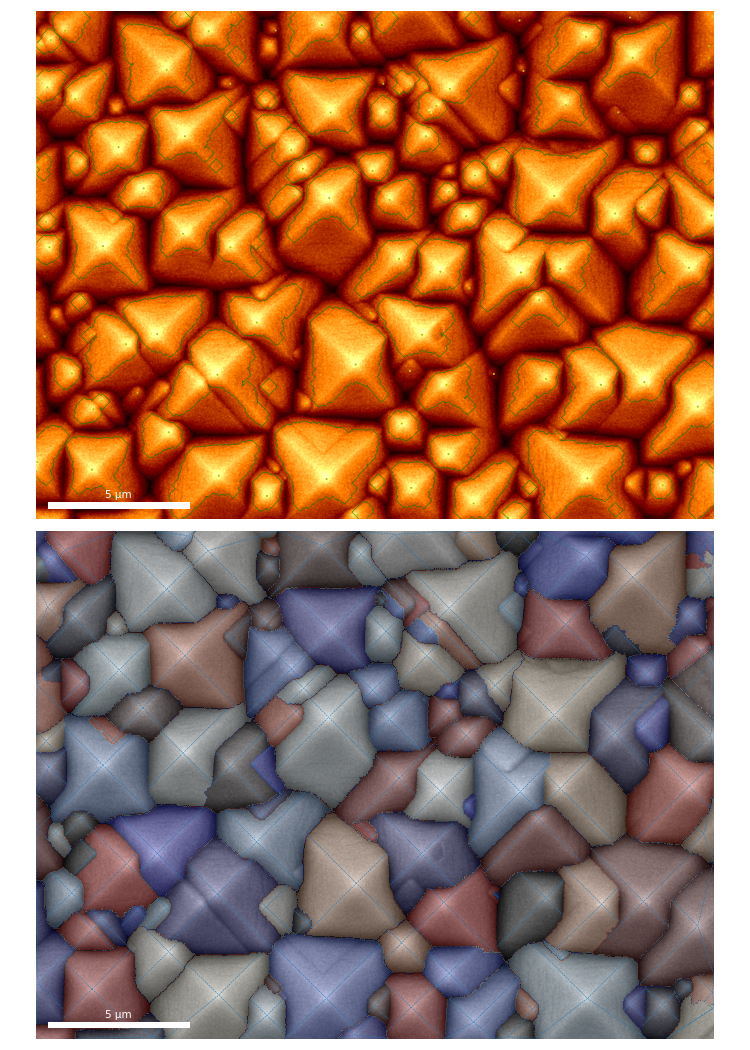

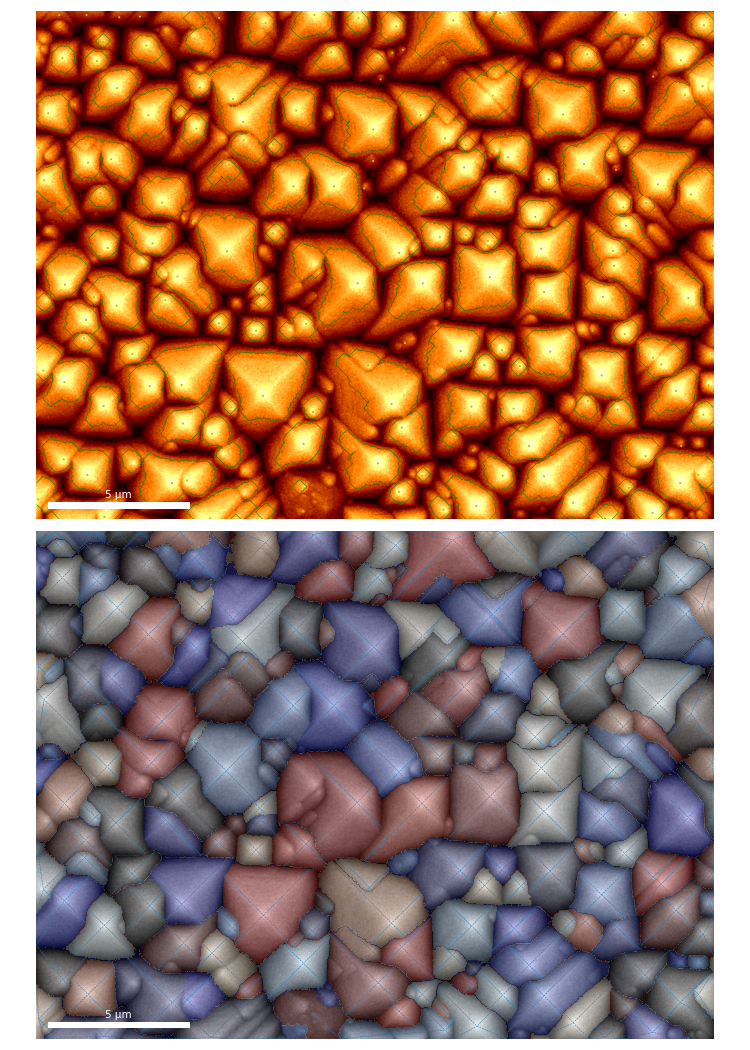

In [4]:
%matplotlib widget
from pyramids.source import Image, PyramidTool


# batch processing of three images
image_names =[
    '39-31 top 5kx.tif',
    '39-58 top 5kx.tif',
    '39-65 top 5kx.tif', ] 

for image_name in image_names:
    
    im = Image('./images/'+image_name, pixel_size=0.02392)
    im.median_filter(size=2)
    pt = PyramidTool(im, dpi=75, figsize=(10, 14))

    # load saved segmentation
    pt.load_coordinates('./results/'+image_name.replace('.tif', '')+' - pyramid coords.npy')

    # load saved measurement
    pt.load_pyramid_measurements('./results/'+image_name.replace('.tif', '')+' - pyramid measurements.npz')
    
    # save a copy of the image (appears in the dashboard)
    pt.axes[0].figure.savefig(image_name.replace('.tif', '.png'), dpi=150.)

## Example 4: Loading the results with `numpy` and measuring some pyramid properties
The vertex measurements can be analysed using the tool of choice. Here are only some examples of analyses using `numpy`.

### Histogram vertex sizes

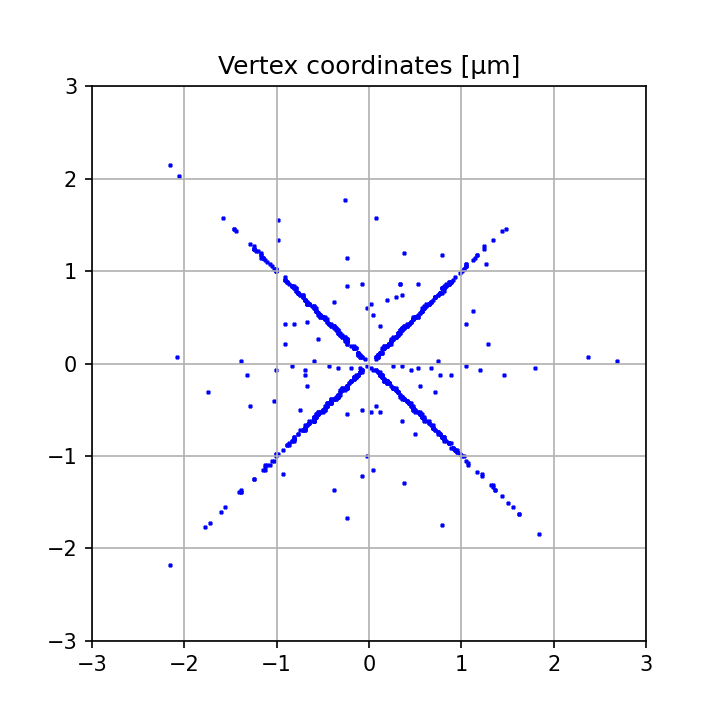

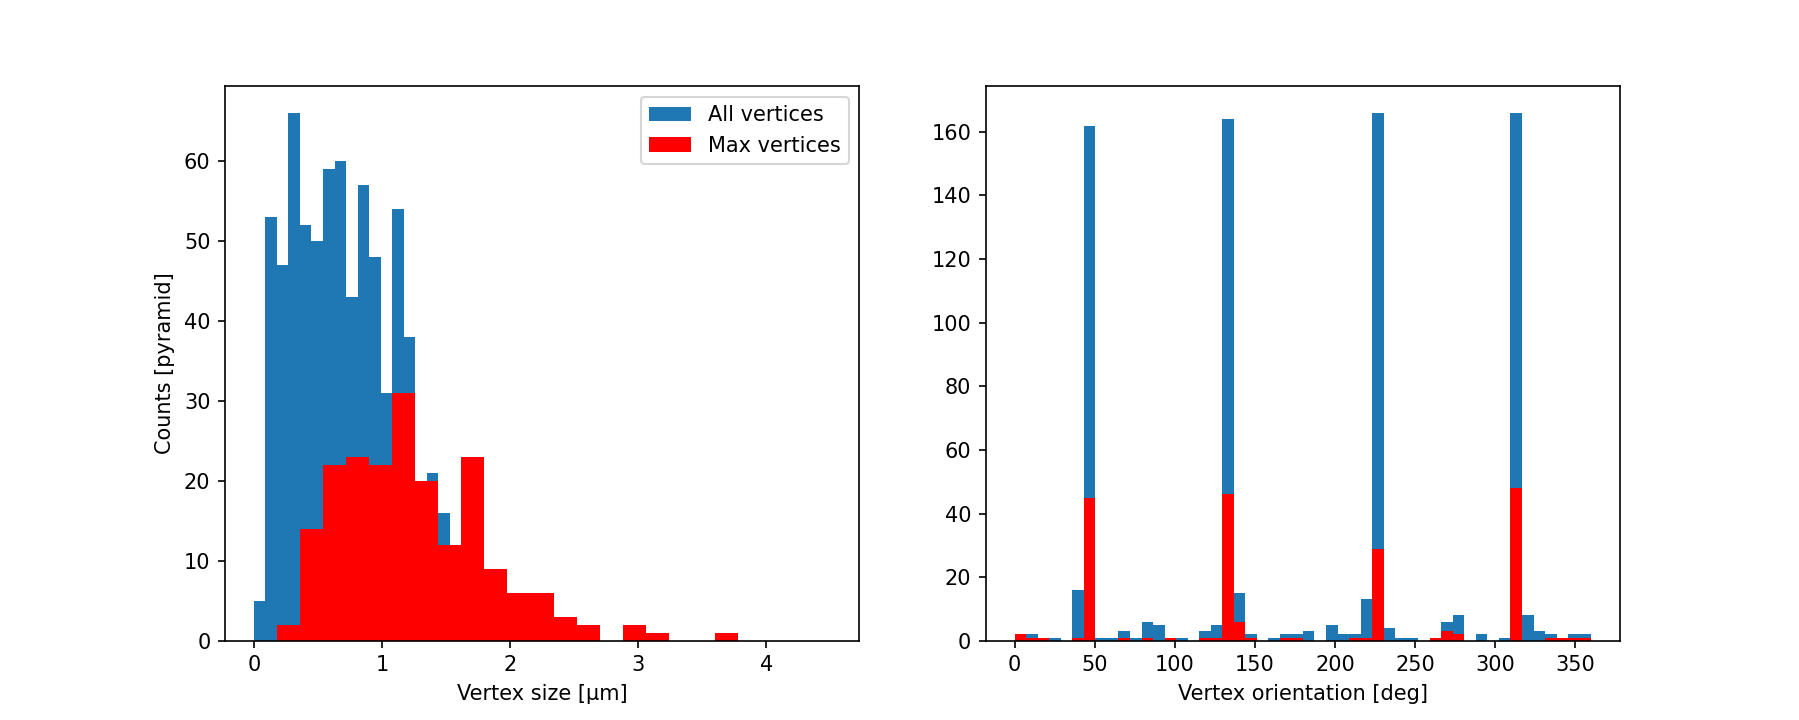

In [5]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

# Select one image from the images folder
#image_name = '39-31 top 5kx.tif' 
#image_name = '39-58 top 5kx.tif' 
image_name = '39-65 top 5kx.tif' 

ps = 0.02392 # pixel-size µm / pixel


sname = './results/' + image_name.replace('.tif',' - pyramid measurements.npz')
vertices = np.load(sname)['vertices']
moduli = np.sqrt(np.sum(vertices**2, -1)) * ps
angles = np.arctan2(vertices[..., 1], vertices[..., 0])
max_indices = np.argmax(moduli, -1)
moduli_max = np.array([moduli[io, idx] for io, idx in enumerate(max_indices)])
angles_max = np.array([angles[io, idx] for io, idx in enumerate(max_indices)])
angles_max_deg = np.rad2deg(angles_max+np.pi)
angles_deg = np.rad2deg(angles+np.pi)

v_plt = vertices.reshape(-1, 2)

# plot 1
figsize = plt.figaspect(1)
f, ax = plt.subplots(dpi=150., figsize=figsize)
ax.scatter(v_plt[:, 1]*ps, v_plt[:, 0]*ps, s=5, c='b', marker='+')
ax.set_ylim(-3., +3.)
ax.set_xlim(-3., +3.)
ax.grid('on')
ax.set_aspect('equal')
ax.set_title('Vertex coordinates [µm]')
sname = image_name.replace('.tif',' - vertex coords.png')
f.savefig(sname)

# plot 2
figsize = plt.figaspect(1/2.5)
f, axs = plt.subplots(1, 2, dpi=150., figsize=figsize)

ax = axs[0]
ax.hist(moduli.reshape(-1), bins=50, range=(0., 4.5), label='All vertices')
ax.hist(moduli_max, bins=25, range=(0., 4.5), color='r', label='Max vertices')
ax.set_xlabel('Vertex size [µm]')
ax.set_ylabel('Counts [pyramid]')
ax.legend()

ax = axs[1]
ax.hist(angles_deg.reshape(-1), bins=50, range=(0., 360.))
ax.hist(angles_max_deg, bins=50, range=(0., 360.), color='r')
ax.set_xlabel('Vertex orientation [deg]')

sname = image_name.replace('.tif',' - vertex stats.png')
f.savefig(sname)

## Histogram vertex properties - height

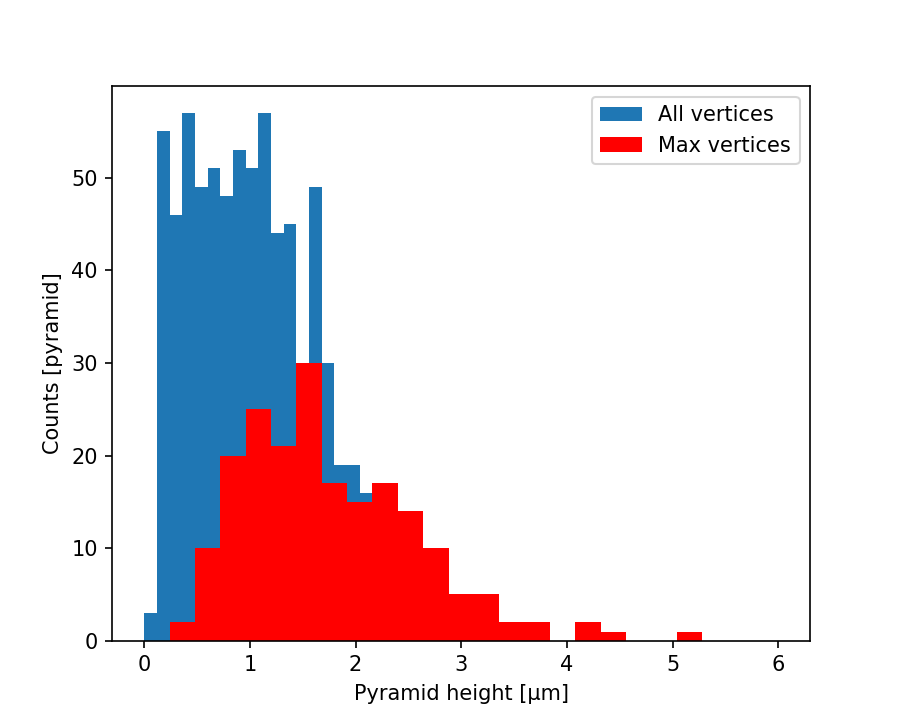

In [6]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

#image_name = '39-31 top 5kx.tif' 
#image_name = '39-58 top 5kx.tif' 
image_name = '39-65 top 5kx.tif' 

ps = 0.02392 # pixel-size µm / pixel
angle = 54.7

sname = './results/' + image_name.replace('.tif',' - pyramid measurements.npz')
vertices = np.load(sname)['vertices']
moduli = np.sqrt(np.sum(vertices**2, -1)) * ps
height = np.tan(np.deg2rad(angle)) * moduli
max_indices = np.argmax(moduli, -1)
height_max = np.array([height[io, idx] for io, idx in enumerate(max_indices)])


figsize = plt.figaspect(0.8)
f, ax = plt.subplots(dpi=150., figsize=figsize)

Rbins = (0., 6.)
ax.hist(height.reshape(-1), bins=50, range=Rbins, label='All vertices')
ax.hist(height_max, bins=25, range=Rbins, color='r', label='Max vertices')
ax.set_xlabel('Pyramid height [µm]')
ax.set_ylabel('Counts [pyramid]')
ax.legend()

sname = image_name.replace('.tif',' - Pyramid height.png')
f.savefig(sname)

## Export vertex sizes and orientations to excel tables

In [19]:
import numpy as np

ps = 0.02392 # pixel-size µm / pixel

image_names = [
    '39-31 top 5kx.tif', 
    '39-58 top 5kx.tif', 
    '39-65 top 5kx.tif', ]

angle = 54.7

for image_name in image_names:
    sname = './results/' + image_name.replace('.tif',' - pyramid measurements.npz')
    vertices = np.load(sname)['vertices']
    moduli = np.sqrt(np.sum(vertices**2, -1)) * ps
    angles = np.arctan2(vertices[..., 1], vertices[..., 0])
    max_indices = np.argmax(moduli, -1)
    moduli_max = np.array([moduli[io, idx] for io, idx in enumerate(max_indices)])
    angles_max = np.array([angles[io, idx] for io, idx in enumerate(max_indices)])
    angles_max_deg = np.rad2deg(angles_max+np.pi)
    height_max = np.tan(np.deg2rad(angle))*moduli_max
    sname = './results/' + image_name.replace('.tif', '- pyramid measurements.csv')
    np.savetxt(
        fname = sname, 
        X = np.stack([moduli_max, angles_max_deg, height_max], axis=1),
        fmt = '%.5f',
        delimiter = ',',
        header='# Modulus [um], Orientation [deg], Height [um]', 
        comments='# Original image name: {0:s} \n# Pixel Size = {1:.5f} um / pixel \n'.format(image_name, ps), )